In [10]:
import pandas as pd

df = pd.read_csv("C:\\Users\\nyash\\Downloads\\Airplane_Crashes_Data_Cleaning\\Airplane_Crashes_and_Fatalities_Since_1908.csv")

print("Initial Setup complete")
print("Data loaded successfully")

Initial Setup complete
Data loaded successfully


## Question 1 

In [11]:
df.shape

(5268, 13)

## Question 2 

In [12]:
df.tail(75)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5193,03/15/2008,08:15,"Nbagu, Nigeria",Trade Wings Aviation Ltd.,NaN,Lagos - Bebi Air Strip,Beechcraft 1900D,5N-JAH,UE-322,3.0,3.0,0.0,The plane crashed while en route. Wreckage was...
5194,04/03/2008,11:00,"Lawa, Suriname",Blue Wing Airlines,NaN,Paramaribo - Lawa,Antonov An-28,PZ-TSO,1AJ007-17,19.0,19.0,0.0,While attempting to land the crew aborted the ...
5195,04/09/2008,23:27,"Bundeena, Australia",Avtex Air Services,NaN,Sydney - Brisbane,Swearingen SA227AC Metroliner III,VH-OZA,AC-600,1.0,1.0,0.0,The pilot of the mail plane reported some mino...
5196,04/11/2008,22:15,"Chrisinau, Moldova",Kata Transportation,NaN,"Chrisinau, Moldova - Antalya, Turkey - Sudan",Antonov An-32,ST-AZL,3009,8.0,8.0,0.0,Just minutes after the take off the plane trie...
5197,04/15/2008,14:30,"Goma, Congo",Hewa Bora Airways,NaN,Goma - Kisangani - Kinshasa,McDonnell Douglas DC-9-51,9Q-CHN,47731,85.0,0.0,47.0,"While attempting to takeoff, the plane failed ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


## Question 4 

In [13]:
df.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

## Answer

 Time: This column had a large number of missing entries. Since time information is not essential for the main analysis, missing values were filled with `"Unknown"` or `"Not Recorded"` to preserve all rows.

 **Location:** Only a few entries were missing, so they were replaced with `"Unknown Location"` to maintain dataset completeness.

 **Operator:** A small number of values were missing. These were filled with `"Unknown Operator"` to avoid data loss.

 **Flight #:** Many flight numbers were missing. Since this column is not very useful for data cleaning or statistical analysis, the missing values were replaced with `"Unknown"`, or the column can be ignored if not needed.

 **Route:** About 1,700 entries were missing. The missing routes were filled with `"Unknown Route"` since this information is mostly descriptive.

 **Type:** This column had very few missing values. The missing entries were filled with `"Unknown Type"`.

 **Registration:** Only a few aircraft registration numbers were missing, and they were replaced with `"Unknown Registration"` to maintain consistency.

**cn/In:** This serial number column had some missing values. These were filled with `"Unknown"` to keep all records.

 **Aboard:** Since this is a numeric column, missing values were replaced with the **median** number of passengers aboard to reduce the influence of outliers.

 **Fatalities:** Missing values were also replaced with the **median** to maintain numeric consistency while avoiding distortion of fatality data.

 **Ground:** Missing values were filled with **0**, assuming that no ground fatalities occurred where the data was missing.

 **Summary:** This text field had several missing values. These were replaced with `"No summary available"` to improve dataset readability.

The **Date** column had no missing data, so it was left unchanged.

These treatments ensure that the dataset remains consistent, complete, and ready for further analysis without dropping valuable records.


## Question 5

In [14]:
fatality_locations = df[['Date', 'Location', 'Aboard', 'Fatalities']].copy()


## Question 6

In [15]:
fatality_locations.loc[fatality_locations['Fatalities'].idxmax(), 'Date']


'03/27/1977'

## Question 7

In [16]:
fatality_locations['No_Fatalities'] = fatality_locations['Fatalities'] == 0
no_fatal = fatality_locations['No_Fatalities'].sum()
print(f"No-fatality crashes: {no_fatal}")


No-fatality crashes: 58


## Question 8

In [17]:
fatality_locations[['Region', 'Country']] = fatality_locations['Location'].str.split(',', n=1, expand=True)
fatality_locations['Country'] = fatality_locations['Country'].str.strip()


## Question 9

In [18]:
top_100 = fatality_locations.sort_values(by='Fatalities', ascending=False).head(100)


## Question 10

Matplotlib is building the font cache; this may take a moment.


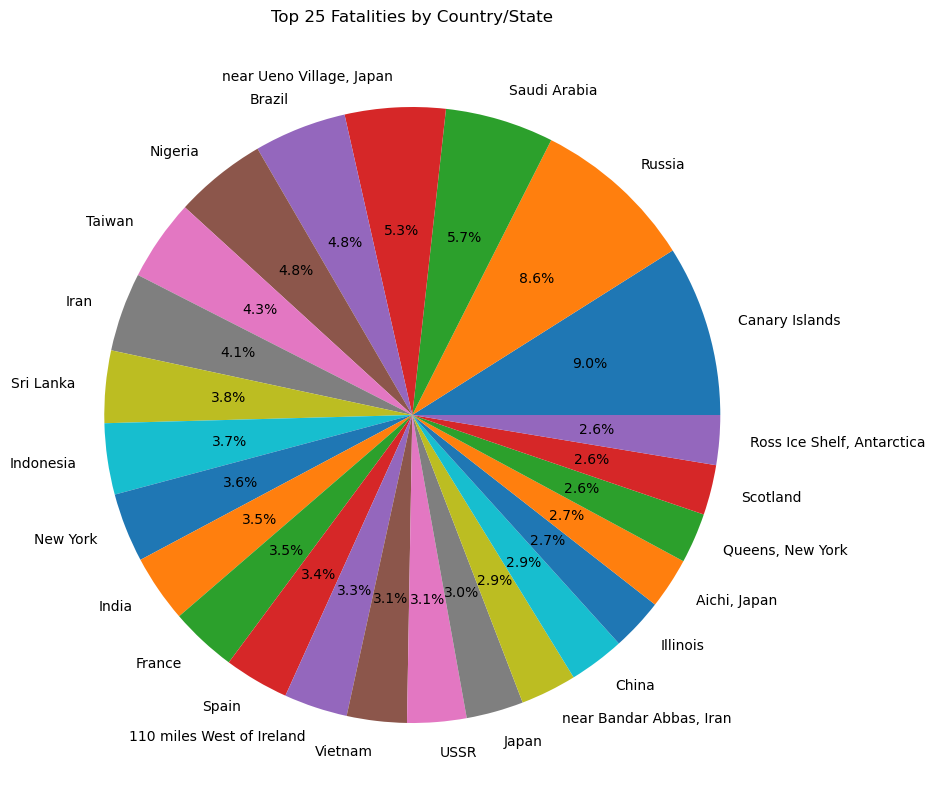

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

top_25 = (top_100.groupby('Country')['Fatalities']
          .sum()
          .nlargest(25))

plt.figure(figsize=(10,10))
top_25.plot.pie(autopct='%1.1f%%')
plt.title('Top 25 Fatalities by Country/State')
plt.ylabel('')
plt.show()
